In [1]:
#Getting and setting up the data

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [8]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of hourses')

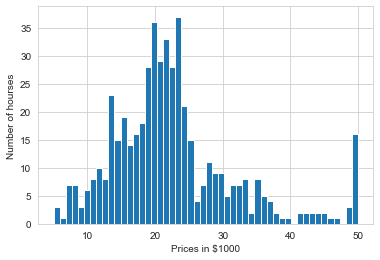

In [12]:
#Always to try to do quick plotting of the data, to make sure nothing is abnormal in it

plt.hist(boston.target,bins=50) # this target method is inbuilt for this data as it is bult in sklearn

plt.xlabel('Prices in $1000')
plt.ylabel('Number of hourses')

Text(0.5, 0, 'Number of rooms')

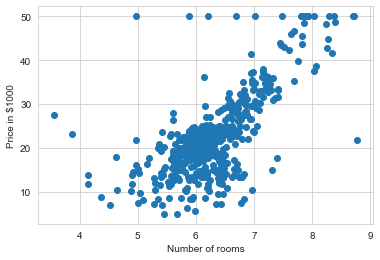

In [18]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1000')
plt.xlabel('Number of rooms')

In [19]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
boston_df.iloc[0,2]

2.31

In [37]:
boston_df['Price'] = boston.target

In [38]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


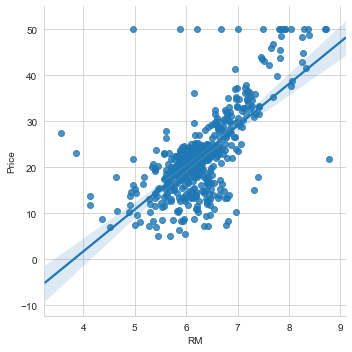

In [42]:
sns.lmplot('RM','Price',data=boston_df) #Linear plot over scatter plot. THis can be done in matplotlib as well, but seaborn gives us linear fit as well

In [49]:
#Least Squares method
#How do we know when the line is best fit ?


#Using Numpy for a Univariate Linear Regression

X = boston_df.RM #Median of the room value
X.shape


(506,)

In [47]:
X = np.vstack(boston_df.RM) # Vertically stack array

In [48]:
X.shape

(506, 1)

In [50]:
Y = boston_df.Price

In [51]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [52]:
#Single variable linear regression using Numpy

#Array needed in the form of [X 1]

X = np.array([[value,1] for value in X]) # Traverse through X set that value, 1 and then create array

In [53]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [54]:
m , b = np.linalg.lstsq(X,Y)[0] # Linear algebra, least square method



C:\Users\Siddhesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


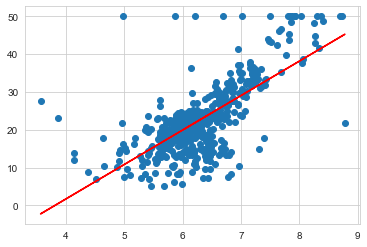

In [55]:
plt.plot(boston_df.RM,boston_df.Price,'o') #scatter plot

#Plot best fit line that we made using numpy

x = boston_df.RM

plt.plot(x,m*x + b,'r',label='Best Fit Line')

In [56]:
#seaborn can do this automatically, we did above by using Least Squares Method manually


In [57]:
#Getting the Error in the fitted line

result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total / len(X)) # Standard deviation formula looks similar

print (' The roor mean square was %.2f' %rmse)
 




 The roor mean square was 6.60


C:\Users\Siddhesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
#scikit learn library to implement a multivariate regression

import sklearn 
from sklearn.linear_model import LinearRegression

In [59]:
lreg = LinearRegression()

In [60]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
#Tab for methoids example lreg() and then press tab


In [62]:
X_multi = boston_df.drop('Price',1) # 1 to drop column, 0 to drop row

Y_target = boston_df.Price

In [63]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print ('The estimated intercept coefficient is %.2f ' %lreg.intercept_)

print ('The number of coefficients used was %d ' %len(lreg.coef_))

The estimated intercept coefficient is 36.46 
The number of coefficients used was 13 


In [75]:
# Data frame creation

coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [99]:
sample_df = pd.DataFrame([[1,2,3,4,5,6],[7,8,9]])

In [97]:
sample_series = pd.Series([[1,2,3,4],[7,8,9]])

In [105]:
sample_series

0    [1, 2, 3, 4]
1       [7, 8, 9]
dtype: object

In [108]:
sample_series.iloc[1,2]

IndexingError: Too many indexers

In [106]:
sample_df.iloc[1,2]

9

In [110]:
#Using Training and Validations

X_train,X_test,Y_train,Y_test= sklearn.model_selection.train_test_split(X,boston_df.Price) # Splitting into training and testing data

#Cross validation method is not available in latest library

In [111]:
print (X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [112]:
# Predict Price of houses

lreg = LinearRegression()

lreg.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
#Running prediction

pred_train = lreg.predict(X_train)

pred_test = lreg.predict(X_test)

In [114]:
print ("Fit a model X_train, and calcualte the MSE with Y_train: %.2f" %np.mean((Y_train - pred_train) **2))

print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f " %np.mean((Y_test - pred_test) **2)) 

Fit a model X_train, and calcualte the MSE with Y_train: 47.15
Fit a model X_train, and calculate MSE with X_test and Y_test: 33.62 


Text(0.5, 1.0, 'Residual Plot')

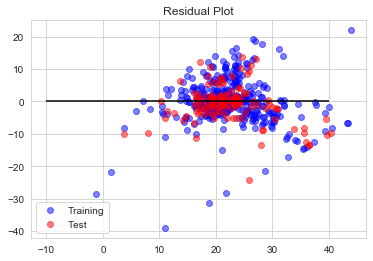

In [116]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha = 0.5)

test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha = 0.5)

plt.hlines(y=0,xmin=-10,xmax=40)

plt.legend((train,test),('Training','Test'),loc = 'lower left')

plt.title('Residual Plot')